<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/1_Initial_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

> [MovieLens-GroupLens](https://grouplens.org/datasets/movielens/)

> [MovieLens Documentation](http://files.grouplens.org/datasets/movielens/ml-25m-README.html)

# Overview

This dataset (ml-25m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.


# References

General Reference if MovieLens dataset used:
> F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19

> https://dl.acm.org/doi/10.1145/2827872

In [ ]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 1) Tags.csv

In [ ]:
downloaded = drive.CreateFile({'id':'1V9qLArorkSBJnRTdj1Ik1-WAIKaMr4Dz'}) 
downloaded.GetContentFile('tags.csv') 

tags = pd.read_csv('tags.csv') 

Data Exploration & Statistical Analysis

In [ ]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
# dropping "timestamp"
tags.drop(['timestamp'], axis=1, inplace=True)

In [ ]:
tags.head(7)

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good
5,4,44665,unreliable narrators
6,4,115569,tense


In [ ]:
tags.shape

(1093360, 3)

In [ ]:
print ("Number of unique user ids: {}".format(tags.userId.nunique()))
print ("Number of unique movie ids: {}".format(tags.movieId.nunique()))
print ("Number of unique movie tags: {}".format(tags.tag.nunique()))

Number of unique user ids: 14592
Number of unique movie ids: 45251
Number of unique movie tags: 73050


In [ ]:
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [ ]:
tags.describe()

,userId,movieId
count,1.093360e+06,1.093360e+06
mean,6.759022e+04,5.849276e+04
std,5.152114e+04,5.968731e+04
min,3.000000e+00,1.000000e+00
25%,1.520400e+04,3.504000e+03
50%,6.219900e+04,4.594000e+04
75%,1.136420e+05,1.029030e+05
max,1.625340e+05,2.090630e+05


In [ ]:
tags["tag"].value_counts().sort_values(ascending=False).head(20)

sci-fi                8330
atmospheric           6516
action                5907
comedy                5702
surreal               5326
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
dark comedy           4026
BD-R                  3966
thought-provoking     3844
romance               3791
stylized              3728
quirky                3677
psychology            3625
woman director        3589
fantasy               3523
classic               3456
Name: tag, dtype: int64

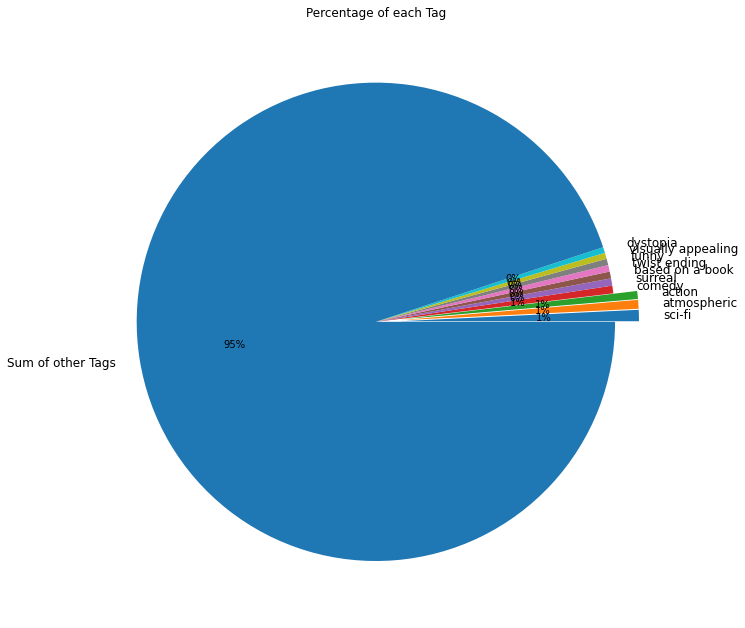

In [ ]:
data_tags_10= tags["tag"].value_counts()[:10].values.tolist()
sum_of_the_rest= sum(tags["tag"].value_counts()[10:])
data_tags_10.append(sum_of_the_rest)

explode= (0.1,0.1,0.1,0,0,0,0,0,0,0,0)
labels= tags["tag"].value_counts()[:10].index.tolist()
labels.append("Sum of other Tags")

plt.figure(figsize=(12,11))
plt.title("Percentage of each Tag")
plt.pie(data_tags_10, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

## Extracting `"tags_set.csv"`

"tags_set.csv" is a more coherent version of the original "tags.csv" MovieLens dataset, breaking
the 1:M relationship between users, movies and tags, by displaying the mulitple tags
assigned per unique movie by unique users. This reduces the shape of the original 
dataset (dataframe from tags.csv) by 788,019 rows.

> As we can see below, user e.g. userId=4 has given tags in more than one movie, and the same time, more than 1 tag for the same movie, which in the dataframe is displayed in a different row. As a consequence, below I am creating a dataframe to break this M:M relationship  for a better data grouping in this dataset

In [ ]:
tags.head(5)

,userId,movieId,tag
0,3,260,classic
1,3,260,sci-fi
2,4,1732,dark comedy
3,4,1732,great dialogue
4,4,7569,so bad it's good


In [ ]:
# first there is need to drop null values
tags.isnull().sum()

userId      0
movieId     0
tag        16
dtype: int64

In [ ]:
tags.dropna(inplace=True)
tags.isnull().sum().any()

False

In [ ]:
# example of how this will be displayed
# e.g. for the user with userId=4 about the movieId=1732
"|".join(tags[(tags["userId"] == 4) & (tags["movieId"] == 1732)].tag.tolist())

'dark comedy|great dialogue'

In [ ]:
# in comments since the dataframe "tag_set" has already been created and displayed into "tag_set.csv"
'''
tags_combined = []
#for uid in tags.head(40).userId.unique():
for unique_user in tags.userId.unique():
  for unique_movie in tags[tags["userId"] == unique_user].movieId.unique():
    tag_set = {"userId": unique_user, "movieId": unique_movie, "tags": "|".join(tags[(tags["userId"] == unique_user) & (tags["movieId"] == unique_movie)].tag.tolist())}
    tags_combined.append(tag_set)
  
tags_set = pd.DataFrame(tags_combined)
tags_set.shape

'''

'\ntags_combined = []\n#for uid in tags.head(40).userId.unique():\nfor unique_user in tags.userId.unique():\n  for unique_movie in tags[tags["userId"] == unique_user].movieId.unique():\n    tag_set = {"userId": unique_user, "movieId": unique_movie, "tags": "|".join(tags[(tags["userId"] == unique_user) & (tags["movieId"] == unique_movie)].tag.tolist())}\n    tags_combined.append(tag_set)\n  \ntags_set = pd.DataFrame(tags_combined)\ntags_set.shape\n\n'

In [ ]:
'''
from google.colab import files

tags_set.to_csv('tags_set.csv', index=False)
files.download('tags_set.csv')
'''

"\nfrom google.colab import files\n\ntags_set.to_csv('tags_set.csv', index=False)\nfiles.download('tags_set.csv')\n"

### Reading "tag_set.csv"

In [ ]:
downloaded = drive.CreateFile({'id':'1cSofXHln3oYEFlehoYS6LQ4j4SfHElZr'}) 
downloaded.GetContentFile('tags_set.csv') 

tags_set = pd.read_csv('tags_set.csv') 
tags_set.shape

(305341, 3)

In [ ]:
tags_set.head()

,userId,movieId,tags
0,3,260,classic|sci-fi
1,4,1732,dark comedy|great dialogue
2,4,7569,so bad it's good
3,4,44665,unreliable narrators
4,4,115569,tense


In [ ]:
tags_set.isnull().sum().any()

False

# 2) genome_tags.csv

`References`for genome tags and genome scores:
> Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Encoding Community Knowledge to Support Novel Interaction. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1–13:44

> https://dl.acm.org/doi/10.1145/2362394.2362395

In [ ]:
downloaded = drive.CreateFile({'id':'1p-TiqX8kPFIlcjdXZqsLBfq0xoQRoE7C'}) 
downloaded.GetContentFile('genome-tags.csv') 

genome_tags = pd.read_csv('genome-tags.csv') 

Data Exploration & Statistical Analysis

In [ ]:
# relationship 1:1
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
genome_tags.shape

(1128, 2)

In [ ]:
print ("Number of unique tag ids: {}".format(genome_tags.tagId.nunique()))
print ("Number of unique tags: {}".format(genome_tags.tag.nunique()))

Number of unique tag ids: 1128
Number of unique tags: 1128


In [ ]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [ ]:
genome_tags.describe()

,tagId
count,1128.000000
mean,564.500000
std,325.769857
min,1.000000
25%,282.750000
50%,564.500000
75%,846.250000
max,1128.000000


In [ ]:
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
genome_tags["tag"].isin(["007"]).sum()
genome_tags[genome_tags["tag"].isin(["007"])].empty

False

# 3) genome_scores.csv

In [ ]:
downloaded = drive.CreateFile({'id':'1BZ8bwfmSkMoEu18Adw2dWQR0u85HTsLH'}) 
downloaded.GetContentFile('genome-scores.csv') 

genome_scores = pd.read_csv('genome-scores.csv') 
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


Data Exploration & Statistical Analysis

In [ ]:
genome_scores.shape

(15584448, 3)

In [ ]:
genome_scores.relevance.value_counts(ascending=False)

0.01425    51705
0.01175    51430
0.01325    51389
0.01350    51340
0.01375    51317
           ...  
0.93125      124
0.95650      118
0.93900      117
0.95175      115
0.00025        4
Name: relevance, Length: 4000, dtype: int64

In [ ]:
print ("Number of unique movie ids: {}".format(genome_scores.movieId.nunique()))
print ("Number of unique tag ids: {}".format(genome_scores.tagId.nunique()))

Number of unique movie ids: 13816
Number of unique tag ids: 1128


In [ ]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [ ]:
genome_scores.describe()

,movieId,tagId,relevance
count,1.558445e+07,1.558445e+07,1.558445e+07
mean,4.602249e+04,5.645000e+02,1.163679e-01
std,5.535221e+04,3.256254e+02,1.544722e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.853750e+03,2.827500e+02,2.400000e-02
50%,8.575500e+03,5.645000e+02,5.650000e-02
75%,8.018650e+04,8.462500e+02,1.407500e-01
max,2.064990e+05,1.128000e+03,1.000000e+00


In [ ]:
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


## Merge: Genome Tags & Genome Scores 

>genome_scores_final dataframe

The only difference here is that the tag description is added and displayed as a new column. All information of the original "genome_scores" remains stable.

In [ ]:
# merge
genome_scores_final= genome_scores.merge(genome_tags, on="tagId")

# changing the order of columns for better visualisation
genome_scores_final=genome_scores_final[["movieId","tagId", "tag", "relevance"]]

genome_scores_final.shape

(15584448, 4)

Data Exploration & Statistical Analysis

In [ ]:
genome_scores_final.head()

,movieId,tagId,tag,relevance
0,1,1,007,0.02875
1,2,1,007,0.04125
2,3,1,007,0.04675
3,4,1,007,0.03425
4,5,1,007,0.04300


In [ ]:
print ("Number of unique movie ids: {}".format(genome_scores_final.movieId.nunique()))
print ("Number of unique tag ids: {}".format(genome_scores_final.tagId.nunique()))

Number of unique movie ids: 13816
Number of unique tag ids: 1128


In [ ]:
genome_scores_final.isnull().sum()

movieId      0
tagId        0
tag          0
relevance    0
dtype: int64

In [ ]:
genome_scores_final.describe()

,movieId,tagId,relevance
count,1.558445e+07,1.558445e+07,1.558445e+07
mean,4.602249e+04,5.645000e+02,1.163679e-01
std,5.535221e+04,3.256254e+02,1.544722e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.853750e+03,2.827500e+02,2.400000e-02
50%,8.575500e+03,5.645000e+02,5.650000e-02
75%,8.018650e+04,8.462500e+02,1.407500e-01
max,2.064990e+05,1.128000e+03,1.000000e+00


In [ ]:
genome_scores_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15584448 entries, 0 to 15584447
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   tag        object 
 3   relevance  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 594.5+ MB


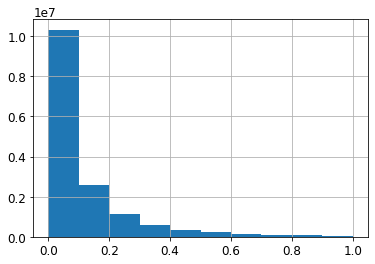

In [ ]:
genome_scores.relevance.hist()

In [ ]:
# adding a new column "relevance_cat"
# it encompasses 10 grades of distribution/stratum of relevance 
# relevance scores histogram shows data is skewed to the left, with more scores touching scores between 0.05 and 0.15
# so it seems a good idea to create group of relevance scores
genome_scores_final["relevance_cat"]= pd.cut(genome_scores_final["relevance"],
                                             bins=[0.,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.75,1.,np.inf],
                                             labels=[0.05,0.15,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.])


In [ ]:
genome_scores_final.head(1)

,movieId,tagId,tag,relevance,relevance_cat
0,1,1,007,0.02875,0.05


In [ ]:
genome_scores_final["relevance_cat"].value_counts()

0.05    7230136
0.15    3093784
0.3     1600409
0.4      994086
0.8      775778
0.5      660875
0.7      585178
0.6      457766
0.9      186436
1.0           0
Name: relevance_cat, dtype: int64

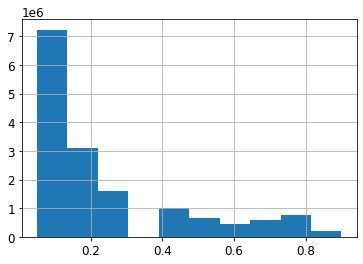

In [ ]:
genome_scores_final.relevance_cat.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


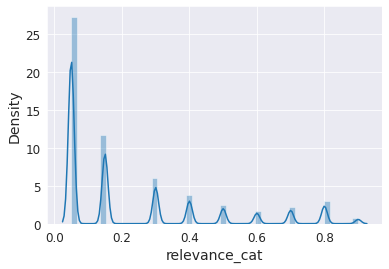

In [ ]:
import seaborn as sns
color= sns.color_palette()
sns.set_style('darkgrid')
sns.distplot(genome_scores_final.relevance_cat)
plt.show()

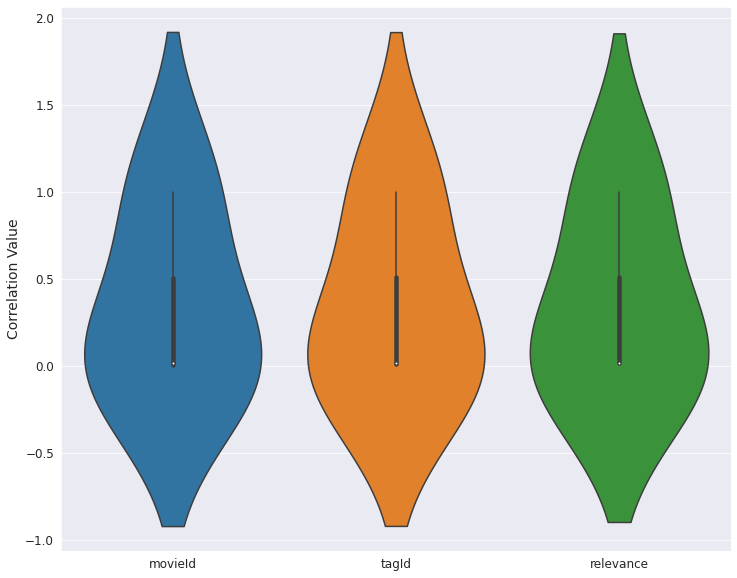

In [ ]:
corr= genome_scores_final.corr()
plt.figure(figsize=(12,10))
plt.ylabel("Correlation Value")
sns.violinplot(data=corr)
plt.show()

In [ ]:
tags["tag"].value_counts().sort_values(ascending=False).head(7)

sci-fi             8330
atmospheric        6516
action             5907
comedy             5702
surreal            5326
based on a book    5079
twist ending       4820
Name: tag, dtype: int64

### Dataframe: `"genome_scores_final_2"`

It is an extension of the merge result between genome tags & scores, but only for genome tags with relavance score >=0.70

In [ ]:
# creating a dataframe generated from the merged genome tags/scores, where relevance score >=0.7

data=[]
for row in genome_scores_final.itertuples(index=True, name='Pandas'):
  if row.relevance >= 0.7:
    data.append([row.movieId, row.tagId, row.tag, row.relevance, row.relevance_cat])

genome_scores_final2 = pd.DataFrame(data, columns=['movieId', 'tagId', 'tag', "relevance", "relevance_cat"])
genome_scores_final2.shape

(244484, 5)

> Data Exploration and Statistical Analysis

In [ ]:
genome_scores_final.head(3) # old merged genome scores/tags

,movieId,tagId,tag,relevance,relevance_cat
0,1,1,007,0.02875,0.05
1,2,1,007,0.04125,0.05
2,3,1,007,0.04675,0.05


In [ ]:
genome_scores_final2.head(3) # new merged genome scores/tags

,movieId,tagId,tag,relevance,relevance_cat
0,10,1,007,0.99950,0.9
1,1517,1,007,0.75225,0.9
2,1722,1,007,0.99975,0.9


> Creating 3 stratums of relevance scores

* when relevance score is in range (0.7 , 0.8), inclusive-exlcusive, then relevance_cat = 1 

* when relevance score is in range (0.8 , 0.9), inclusive-exlcusive, then relevance_cat = 2

* when relevance score is in range (0.9 , 1), inclusive, then relevance_cat = 3 

In [ ]:
# creating 3 stratums of relevance:
# 1-->  0.7 <= relevance < 0.8
# 2-->  0.8 <= relevance < 0.9
# 3 --> 0.9 <= relevance <= 1
genome_scores_final2["rel_cat_final"]= pd.cut(genome_scores_final2["relevance"],
                                             bins=[0.6999,0.7999,0.8999,np.inf],
                                             labels=[1,2,3])

In [ ]:
genome_scores_final2.head(1)

,movieId,tagId,tag,relevance,relevance_cat,rel_cat_final
0,10,1,007,0.9995,0.9,3


In [ ]:
genome_scores_final2["rel_cat_final"].value_counts().sort_values(ascending=False).head(20)

1    106054
2     75301
3     63129
Name: rel_cat_final, dtype: int64

In [ ]:
# no need for the old relevance category so here dropping it:

genome_scores_final2.drop(['relevance_cat'], axis=1, inplace=True)
genome_scores_final2.head(1)

,movieId,tagId,tag,relevance,rel_cat_final
0,10,1,007,0.9995,3


In [ ]:
# renaming rel_cat_final --> relevance_cat

genome_scores_final2.rename(columns={'rel_cat_final': 'relevance_cat'}, inplace=True)
genome_scores_final2.head(1)

,movieId,tagId,tag,relevance,relevance_cat
0,10,1,007,0.9995,3


In [ ]:
genome_scores_final2.shape

(244484, 5)

In [ ]:
print ("Number of unique movie ids: {}".format(genome_scores_final2.movieId.nunique()))
print ("Number of unique tags: {}".format(genome_scores_final2.tag.nunique()))

Number of unique movie ids: 13770
Number of unique tags: 1119


In [ ]:
genome_scores_final2.isnull().sum().any()

False

In [ ]:
genome_scores_final2.head(1)

,movieId,tagId,tag,relevance,relevance_cat
0,10,1,007,0.9995,3


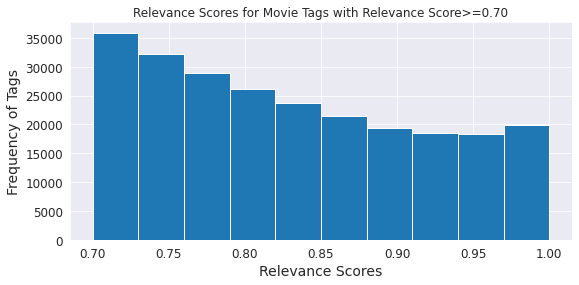

In [ ]:
genome_scores_final2.relevance.hist(figsize=(9,4))
plt.xlabel("Relevance Scores")
plt.ylabel("Frequency of Tags")
plt.title("Relevance Scores for Movie Tags with Relevance Score>=0.70")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


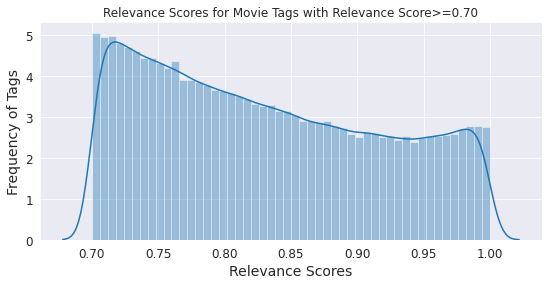

In [ ]:
import seaborn as sns
color= sns.color_palette
plt.figure(figsize=(9,4))
sns.set_style('darkgrid')
sns.distplot(genome_scores_final2.relevance)
plt.title("Relevance Scores for Movie Tags with Relevance Score>=0.70")
plt.xlabel("Relevance Scores")
plt.ylabel("Frequency of Tags")

plt.show()

Text(0.5, 1.0, 'Relevance Categories in Genome Scores')

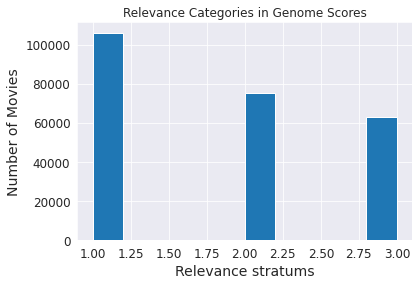

In [ ]:
genome_scores_final2.relevance_cat.hist()
plt.xlabel("Relevance stratums")
plt.ylabel("Number of Movies")
plt.title("Relevance Categories in Genome Scores")

In [ ]:
genome_scores_final2["tag"].value_counts().sort_values(ascending=False).head(20)

original              8128
mentor                2228
weird                 1922
criterion             1914
drama                 1801
comedy                1721
suspense              1620
storytelling          1580
chase                 1551
melancholic           1476
relationships         1439
visually appealing    1430
action                1429
good soundtrack       1374
great acting          1364
cinematography        1362
independent film      1307
enigmatic             1254
brutality             1206
violence              1202
Name: tag, dtype: int64

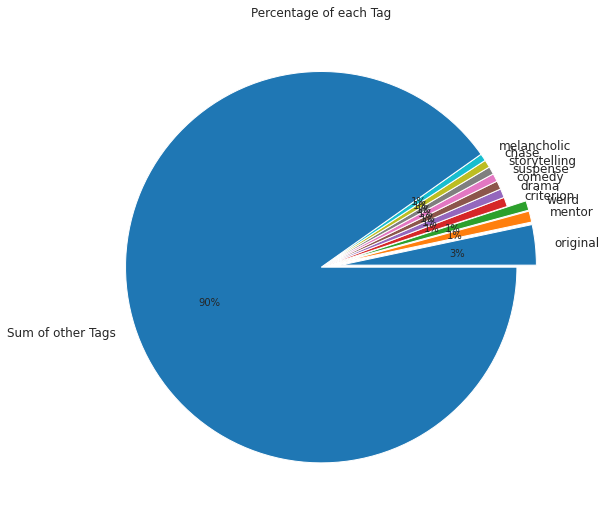

In [ ]:
tags_genome= genome_scores_final2["tag"].value_counts()[:10].values.tolist()
sum_of_the_rest= sum(genome_scores_final2["tag"].value_counts()[10:])
tags_genome.append(sum_of_the_rest)

explode= (0.1,0.1,0.1,0,0,0,0,0,0,0,0)
labels= genome_scores_final2["tag"].value_counts()[:10].index.tolist()
labels.append("Sum of other Tags")

plt.figure(figsize=(9,9))
plt.title("Percentage of each Tag")
plt.pie(tags_genome, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

#### Extracting `"genome_scores_final2.csv"`

In [ ]:
'''
from google.colab import files

genome_scores_final2.to_csv('genome_scores_final2.csv', index=False)
files.download('genome_scores_final2.csv')

'''

"\nfrom google.colab import files\n\ngenome_scores_final2.to_csv('genome_scores_final2.csv', index=False)\nfiles.download('genome_scores_final2.csv')\n\n"

# 4) links.csv

In [ ]:
downloaded = drive.CreateFile({'id':'1OwDHRdDISPHrzVQRFXWxFo1jL7lJvUTC'}) 
downloaded.GetContentFile('links.csv') 

links = pd.read_csv('links.csv') 
links.head(6)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0


Data Exploration & Statistical Analysis

In [ ]:
links.shape

(62423, 3)

In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [ ]:
links.dropna(inplace=True)
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

In [ ]:
for x in links.tmdbId:
  x= int(x)

In [ ]:
type(links["tmdbId"][0])

numpy.float64

# 5) movies.csv

In [ ]:
downloaded = drive.CreateFile({'id':'1GapBuHgwBrZG7lQ22o9d0fS1YpLb3siL'}) 
downloaded.GetContentFile('movies.csv') 

movies = pd.read_csv('movies.csv') 
movies.head(6)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller


Data Exploration & Statistical Analysis

In [ ]:
print (movies.shape)

(62423, 3)


In [ ]:
print ("Number of unique movie ids: {}".format(movies.movieId.nunique()))
print ("Number of unique genres {}".format(movies.genres.nunique()))

Number of unique movie ids: 62423
Number of unique genres 1639


In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
movies["genres"].value_counts().sort_values(ascending=False).head(20)

Drama                   9056
Comedy                  5674
(no genres listed)      5062
Documentary             4731
Comedy|Drama            2386
Drama|Romance           2126
Horror                  1661
Comedy|Romance          1577
Comedy|Drama|Romance    1044
Drama|Thriller           933
Thriller                 919
Crime|Drama              903
Horror|Thriller          851
Animation                729
Drama|War                653
Action                   562
Western                  560
Action|Drama             536
Crime|Drama|Thriller     502
Action|Thriller          445
Name: genres, dtype: int64

# 6) ratings.csv

In [ ]:
downloaded = drive.CreateFile({'id':'1fo7hk7_XJY3Gqj88NkXraqC3-kK7Lr4i'}) 
downloaded.GetContentFile('ratings.csv') 

ratings = pd.read_csv('ratings.csv') 
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


Data Exploration & Statistical Analysis

In [ ]:
# experimenting
# taking e.g. user with id=50 and see how many entries there are
data=[]
for row in ratings.itertuples(index=True, name='Pandas'):
  if row.userId==50:
    if row.rating >= 4:
      data.append([row.userId, row.movieId, row.rating])

df = pd.DataFrame(data, columns=['userId', 'movieId', 'rating'])
df.shape

(67, 3)

In [ ]:
df.head()

,userId,movieId,rating
0,50,1,4.0
1,50,31,4.5
2,50,32,4.0
3,50,47,4.0
4,50,296,5.0


## Rating_Category **(rating_cat)**
Introducting a new column "rating_cat" which will have `3 values`: `"1"`, `"2"`, and `"3"`. "1" corresponds to all rating scores from 1 to 2 (negative score), "3" to ratings with scores between 2.5 and 3.5 (neutral score), and "3" to ratings with either 4, 4.5 or 5 score (positive score)

> Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars). 

>> rating 0.5|1|1.5|2 --> rating_cat= 1

>> rating 2.5|3|3.5   --> rating_cat= 2

>> rating 4|4.5|5    -->  rating_cat=3

In [ ]:
# creating lists of results which will be transferred as new column in dataframe

rating_cat_list=[]
for row in ratings.itertuples(index=True, name='Pandas'):
  if row.rating >=0 and row.rating <=2: # 0<=rating<=2
    result=1
    rating_cat_list.append(result)
  elif row.rating > 2 and row.rating <4: #  2<rating<4
    result=2
    rating_cat_list.append(result)
  else:                                 #  4<=rating<=5
    result=3
    rating_cat_list.append(result)

ratings["rating_cat"]=rating_cat_list
ratings.head(1)

,userId,movieId,rating,timestamp,rating_cat
0,1,296,5.0,1147880044,3


In [ ]:
ratings.shape #same number of rows, but with one more column

(25000095, 5)

In [ ]:
ratings.isnull().any()

userId        False
movieId       False
rating        False
timestamp     False
rating_cat    False
dtype: bool

In [ ]:
ratings.head(10)

,userId,movieId,rating,timestamp,rating_cat
0,1,296,5.0,1147880044,3
1,1,306,3.5,1147868817,2
2,1,307,5.0,1147868828,3
3,1,665,5.0,1147878820,3
4,1,899,3.5,1147868510,2
5,1,1088,4.0,1147868495,3
6,1,1175,3.5,1147868826,2
7,1,1217,3.5,1147878326,2
8,1,1237,5.0,1147868839,3
9,1,1250,4.0,1147868414,3


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp,rating_cat
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09,2.369701e+00
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08,6.998861e-01
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08,1.000000e+00
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09,2.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09,2.000000e+00
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09,3.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09,3.000000e+00


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   userId      int64  
 1   movieId     int64  
 2   rating      float64
 3   timestamp   int64  
 4   rating_cat  int64  
dtypes: float64(1), int64(4)
memory usage: 953.7 MB


Text(0, 0.5, 'Count')

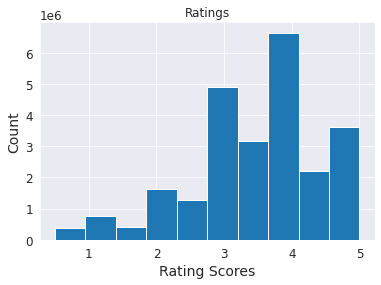

In [ ]:
ratings["rating"].hist()
plt.title("Ratings")
plt.xlabel("Rating Scores")
plt.ylabel("Count")

In [ ]:
ratings["rating"].value_counts().sort_values(ascending=False).head(10)

4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: rating, dtype: int64

In [ ]:
ratings.rating_cat.value_counts()

3    12452811
2     9337043
1     3210241
Name: rating_cat, dtype: int64

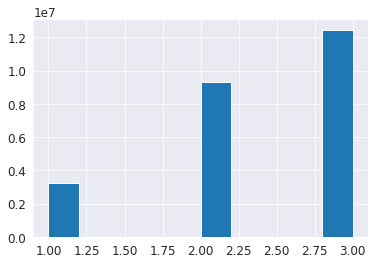

In [ ]:
ratings.rating_cat.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


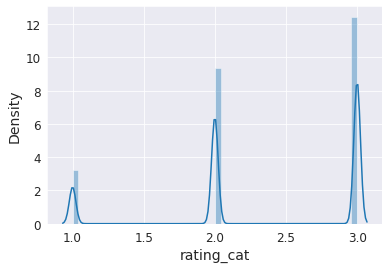

In [ ]:
import seaborn as sns
color= sns.color_palette()
sns.set_style('darkgrid')
sns.distplot(ratings.rating_cat)
plt.show()

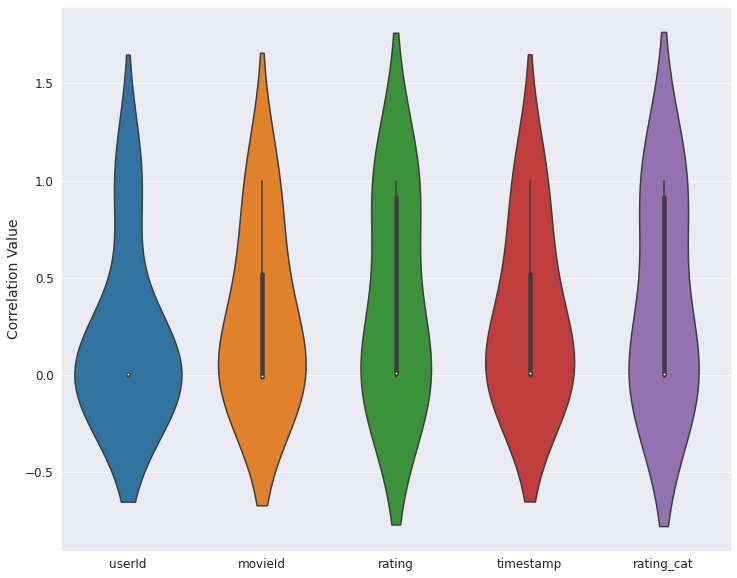

In [ ]:
corr= ratings.corr()
plt.figure(figsize=(12,10))
plt.ylabel("Correlation Value")
sns.violinplot(data=corr)
plt.show()

# Merge Movies & Links

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
movies_links= movies.merge(links,on='movieId')
movies_links.shape

(62316, 5)

In [ ]:
movies_links.isnull().sum()

movieId    0
title      0
genres     0
imdbId     0
tmdbId     0
dtype: int64

In [ ]:
movies_links.head()

,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0


In [ ]:
# adding column "overview"
overview =[]                                                                                                              
overview = pd.Series(overview)                                                                                                                             

movies_links["overview"] = overview
movies_links_overview= movies_links
movies_links_overview.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


,movieId,title,genres,imdbId,tmdbId,overview
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,NaN
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,NaN


In [ ]:
movies_links_overview.isnull().sum()

movieId         0
title           0
genres          0
imdbId          0
tmdbId          0
overview    62316
dtype: int64

# Merge (Movies & Links) with Tags

In [ ]:
movies_links_tags= movies_links_overview.merge(tags,on='movieId')
movies_links_tags.shape

(1093062, 8)

In [ ]:
movies_links_tags.head(3)

,movieId,title,genres,imdbId,tmdbId,overview,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,NaN,791,Owned
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,NaN,1048,imdb top 250
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,NaN,1361,Pixar


In [ ]:
movies_links_tags.shape

(1093062, 8)

Text(0, 0.5, 'Movie Tags')

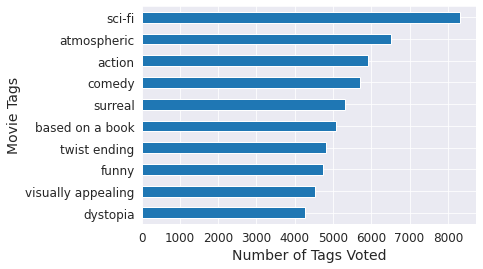

In [ ]:
movies_links_tags["tag"].value_counts().nlargest(10).sort_values(ascending=True).plot.barh()
plt.xlabel("Number of Tags Voted")
plt.ylabel("Movie Tags")

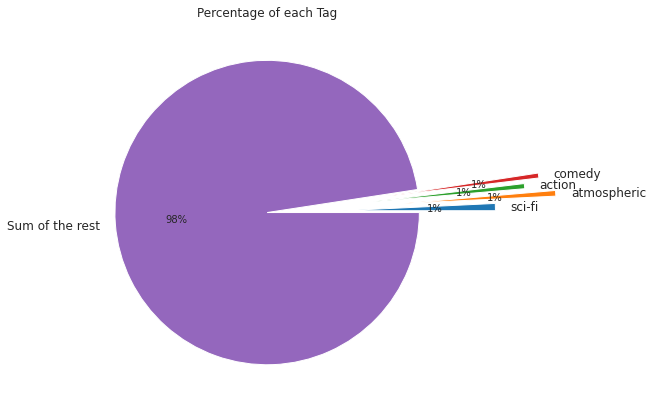

In [ ]:
data_tags_4= movies_links_tags["tag"].value_counts()[:4].values.tolist()
sum_of_the_rest= sum(movies_links_tags["tag"].value_counts()[4:])
data_tags_4.append(sum_of_the_rest)

explode= (0.5,0.9,0.7,0.8,0)
labels= movies_links_tags["tag"].value_counts()[:4].index.tolist()
labels.append("Sum of the rest")

plt.figure(figsize=(12,7))
plt.title("Percentage of each Tag")
plt.pie(data_tags_4, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

In [ ]:
movies_links_tags["tag"].value_counts().sort_values(ascending=False).head(15)

sci-fi                8330
atmospheric           6516
action                5907
comedy                5701
surreal               5324
based on a book       5079
twist ending          4820
funny                 4738
visually appealing    4526
dystopia              4257
dark comedy           4026
BD-R                  3965
thought-provoking     3837
romance               3791
stylized              3728
Name: tag, dtype: int64

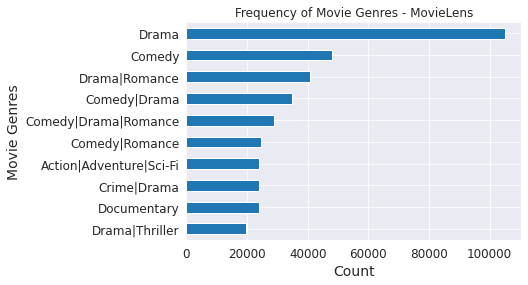

<Figure size 648x288 with 0 Axes>

In [ ]:
movies_links_tags["genres"].value_counts().nlargest(10).sort_values(ascending=True).plot.barh()
plt.xlabel("Count")
plt.ylabel("Movie Genres")
plt.title("Frequency of Movie Genres - MovieLens")
plt.figure(figsize=(9,4))
plt.show()

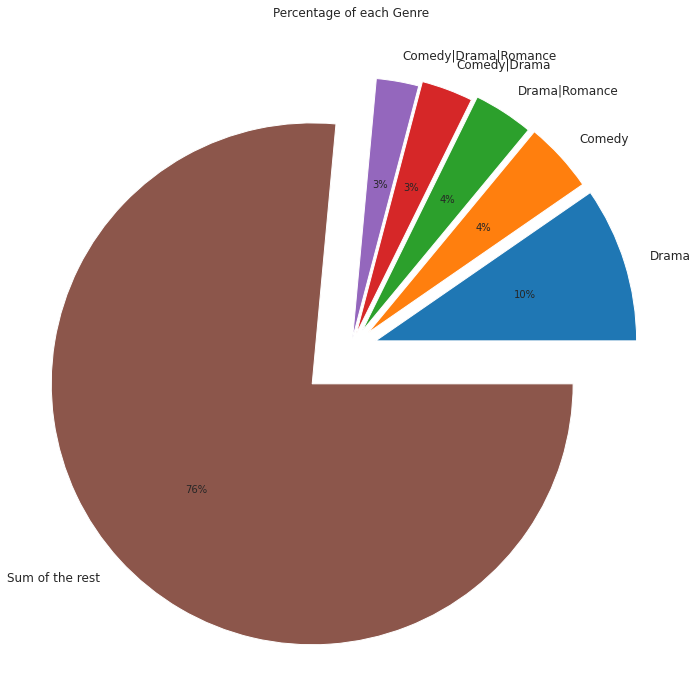

In [ ]:
data_genres_5= movies_links_tags["genres"].value_counts()[:5].values.tolist()
sum_of_the_rest= sum(movies_links_tags["genres"].value_counts()[5:])
data_genres_5.append(sum_of_the_rest)

explode= (0.1,0.09,0.08,0.06,0.04,0.2)
labels= movies_links_tags["genres"].value_counts()[:5].index.tolist()
labels.append("Sum of the rest")

plt.figure(figsize=(12,12))
plt.title("Percentage of each Genre")
plt.pie(data_genres_5, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

In [ ]:
movies_links_tags["genres"].value_counts().sort_values(ascending=False).head(15)

Drama                      105189
Comedy                      47868
Drama|Romance               40621
Comedy|Drama                34969
Comedy|Drama|Romance        28735
Comedy|Romance              24600
Action|Adventure|Sci-Fi     24005
Crime|Drama                 23923
Documentary                 23803
Drama|Thriller              19569
Horror                      18241
Crime|Drama|Thriller        14452
Action|Sci-Fi|Thriller      14179
Drama|War                   12323
Horror|Thriller             12149
Name: genres, dtype: int64

In [ ]:
movies_links_tags.tag.nunique()

73010

In [ ]:
movies_links_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093062 entries, 0 to 1093061
Data columns (total 8 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   movieId   1093062 non-null  int64  
 1   title     1093062 non-null  object 
 2   genres    1093062 non-null  object 
 3   imdbId    1093062 non-null  int64  
 4   tmdbId    1093062 non-null  float64
 5   overview  0 non-null        float64
 6   userId    1093062 non-null  int64  
 7   tag       1093062 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 75.1+ MB


In [ ]:
movies_links_tags.describe()

,movieId,imdbId,tmdbId,overview,userId
count,1.093062e+06,1.093062e+06,1.093062e+06,0.0,1.093062e+06
mean,5.849013e+04,9.276627e+05,7.103140e+04,NaN,6.758893e+04
std,5.968833e+04,1.382732e+06,1.181500e+05,NaN,5.152244e+04
min,1.000000e+00,1.000000e+00,2.000000e+00,NaN,3.000000e+00
25%,3.504000e+03,1.042330e+05,1.620000e+03,NaN,1.520400e+04
50%,4.592800e+04,3.275970e+05,1.302700e+04,NaN,6.219900e+04
75%,1.029030e+05,1.228705e+06,7.058100e+04,NaN,1.136520e+05
max,2.090630e+05,1.097152e+07,6.376270e+05,NaN,1.625340e+05


# TMDb - Fetching Movie Plots


In [ ]:
pip install tmdbsimple

In [ ]:
pip install tmdbv3api

In [ ]:
# below several efforts are shown in order to make a connection with the tmdB database
# however these were not successful, and the next cells display how the data finally was collected
'''
import requests

url= "https://api.themoviedb.org/3/movie/862?api_key=b31f3d95f50928e5f2140f6ede6f24bd&language=en-US"

response= requests.get(url)

print (response.text)

***************************************************************************************************************************************


import http.client
conn = http.client.HTTPSConnection("api.themoviedb.org")
conn.request("GET", "/3/movie/862?api_key=b31f3d95f50928e5f2140f6ede6f24bd")
r1 = conn.getresponse()
print(r1.status, r1.reason)
if r1.status == 200:
    data1 = r1.read()
    print (data1)
***************************************************************************************************************************************
 https://www.themoviedb.org/talk/5b559d8cc3a3685c8e01615d


***************************************************************************************************************************************

for id in links["tmdbId"]:
  if id in tmdb.Movies(int(tmdb_id)):
    m= movie.details(id)
    print(m.overview)
***************************************************************************************************************************************

# suggested from stackoverflow

for id in links["tmdbId"]:
  if movie.details(int(id)):
    m=movie.details(int(id))
    print(from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = 'b31f3d95f50928e5f2140f6ede6f24bd'

tmdb.language = 'en'
tmdb.debug = True

movie = Movie()
m = movie.details(862)

print(m.title)
print(m.overview)
print(m.popularity)
print (m.id)m.overview)

'''

'\nimport requests\n\nurl= "https://api.themoviedb.org/3/movie/862?api_key=b31f3d95f50928e5f2140f6ede6f24bd&language=en-US"\n\nresponse= requests.get(url)\n\nprint (response.text)\n\n***************************************************************************************************************************************\n\n\nimport http.client\nconn = http.client.HTTPSConnection("api.themoviedb.org")\nconn.request("GET", "/3/movie/862?api_key=b31f3d95f50928e5f2140f6ede6f24bd")\nr1 = conn.getresponse()\nprint(r1.status, r1.reason)\nif r1.status == 200:\n    data1 = r1.read()\n    print (data1)\n***************************************************************************************************************************************\n https://www.themoviedb.org/talk/5b559d8cc3a3685c8e01615d\n\n\n***************************************************************************************************************************************\n\nfor id in links["tmdbId"]:\n  if id in tmdb.Movies(int(tmdb_id)

In [ ]:
# successfull connection
from tmdbv3api import TMDb
from tmdbv3api import Movie
tmdb = TMDb()
tmdb.api_key = 'b31f3d95f50928e5f2140f6ede6f24bd'

tmdb.language = 'en'
tmdb.debug = True

movie = Movie()
m = movie.details(862)

print(m.title)
print(m.overview)
print(m.popularity)
print (m.id)

Toy Story
Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.
57.831
862


In [ ]:
# Successful connection with the tmdB database
# Fetching 10  overviews from the first 10 movie ids provided by the MovieLens "links.csv" file, for a first feedback from the tmdb api
movie = Movie()
for id in links["tmdbId"][:10]:
  m= movie.details(id)
  print(m.overview)

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.
When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures.
A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cook

## Final CSV file `(movies_final)`

The CSV file created `(final_8.csv)` contains totally `62,324` movie overviews. The other column features of this csv file come from the merge of movies.csv & links.csv provided by MovieLens, MovieLens 25M Dataset https://grouplens.org/datasets/movielens/.

However, the final number of movies kept for data analysis (movie overviews and other information) was `55,877` `(movies_final.csv)`. The procedure and rationale followed was:

Initially, the csv files "links.csv" and "movies.csv", provided by MovieLens, were merged based on their distinct movie id. This number was true for 62,423 movies. Nonetheless, some of them had no link to the tmdB database, hence a smaller number of 62,324 movies could be linked and extracted from the latter database. 

The movie orerviews were collected through a personal API key provided by the tmdB database for developers, and were fetched into a set of 8 csv files (in order to avoid crush errors during the data download). "csv8_final" finally contained the final result which encompassed all previous movies through index iteration baded on the movie id.

During the data extraction, two main problems occured: either movies with an available movie id from MovieLens csv file were no longer in tmdB database (probably because of update reasons), or movies existed in tmdB but without an overview displayed availabe. The total number of these occurences was 1,765 and, as a consequence, the total number of movies became 60,559.

After reading the csv file with python and assigning it into a dataframe, a deeper data exploration took place. Care for dropping rows containing null values had already taken place from previous steps, however, duplicate values were identified (e.g. repetition of movies in movielens csv files led to double fetching of overviews from the tmdB database) and these were fixed by keeping only the distinct values. This reduced the number of total movies by 4,682 reaching the final of 55,877 (distinct) movies along with their metadata (title, overview, genres, etc).

In [ ]:
# in comments in order to avoid unnecessary reproducibility of the csv files
'''
# csv no.1
count=0
movie = Movie()
index=0
for id in movies_links_overview["tmdbId"][:100]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.2
count=0
movie = Movie()
index=100
for id in movies_links_overview["tmdbId"][100:300]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.3
count=0
movie = Movie()
index=300
for id in movies_links_overview["tmdbId"][300:10000]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.4
count=0
movie = Movie()
index=10000
for id in movies_links_overview["tmdbId"][10000:20000]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.5
count=0
movie = Movie()
index=20000
for id in movies_links_overview["tmdbId"][20000:31500]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.6
count=0
movie = Movie()
index=31500
for id in movies_links_overview["tmdbId"][31500:43000]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.7
count=0
movie = Movie()
index=43000
for id in movies_links_overview["tmdbId"][43000:54000]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

# csv no.8
count=0
movie = Movie()
index=54000
for id in movies_links_overview["tmdbId"][54000:]:
  try:
    m= movie.details(id)
    if m.overview == "We don't have an overview translated in English. Help us expand our database by adding one.":
      movies_links_overview["overview"][index] = "Error"
      index=index+1
    else:
      movies_links_overview["overview"][index] = m.overview
      index=index+1
      count=count+1
      print(count)
  except:
    print("Problem with id: {}".format(movie.details(id)))
    index=index+1
    
print("Number of movie overviews extracted: {}".format(count))

'''

'\n# csv no.1\ncount=0\nmovie = Movie()\nindex=0\nfor id in movies_links_overview["tmdbId"][:100]:\n  try:\n    m= movie.details(id)\n    if m.overview == "We don\'t have an overview translated in English. Help us expand our database by adding one.":\n      movies_links_overview["overview"][index] = "Error"\n      index=index+1\n    else:\n      movies_links_overview["overview"][index] = m.overview\n      index=index+1\n      count=count+1\n      print(count)\n  except:\n    print("Problem with id: {}".format(movie.details(id)))\n    index=index+1\n    \nprint("Number of movie overviews extracted: {}".format(count))\n\n# csv no.2\ncount=0\nmovie = Movie()\nindex=100\nfor id in movies_links_overview["tmdbId"][100:300]:\n  try:\n    m= movie.details(id)\n    if m.overview == "We don\'t have an overview translated in English. Help us expand our database by adding one.":\n      movies_links_overview["overview"][index] = "Error"\n      index=index+1\n    else:\n      movies_links_overview["

### Extracting "final_8.csv"

In [ ]:
# in comments in order to avoid unnecessary reproducibility of the csv files
'''
from google.colab import files

movies_links_overview.to_csv('final_1.csv', index=False)
files.download('final_1.csv')

movies_links_overview.to_csv('final_2.csv', index=False)
files.download('final_2.csv')

movies_links_overview.to_csv('final_3.csv', index=False)
files.download('final_3.csv')

movies_links_overview.to_csv('final_4.csv', index=False)
files.download('final_4.csv')

movies_links_overview.to_csv('final_5.csv', index=False)
files.download('final_5.csv')

movies_links_overview.to_csv('final_6.csv', index=False)
files.download('final_6.csv')

from google.colab import files

movies_links_overview.to_csv('final_7.csv', index=False)
files.download('final_7.csv')

movies_links_overview.to_csv('final_8.csv', index=False)
files.download('final_8.csv')

'''

"\nfrom google.colab import files\n\nmovies_links_overview.to_csv('final_1.csv', index=False)\nfiles.download('final_1.csv')\n\nmovies_links_overview.to_csv('final_2.csv', index=False)\nfiles.download('final_2.csv')\n\nmovies_links_overview.to_csv('final_3.csv', index=False)\nfiles.download('final_3.csv')\n\nmovies_links_overview.to_csv('final_4.csv', index=False)\nfiles.download('final_4.csv')\n\nmovies_links_overview.to_csv('final_5.csv', index=False)\nfiles.download('final_5.csv')\n\nmovies_links_overview.to_csv('final_6.csv', index=False)\nfiles.download('final_6.csv')\n\nfrom google.colab import files\n\nmovies_links_overview.to_csv('final_7.csv', index=False)\nfiles.download('final_7.csv')\n\nmovies_links_overview.to_csv('final_8.csv', index=False)\nfiles.download('final_8.csv')\n\n"

### Dataframe - `"final_8"`

> Data Exploration & Statistican Analysis

In [ ]:
# Reading the final csv file
downloaded = drive.CreateFile({'id':'1tCmwweQHx3akdq1T1iLucwqmLxPPGcor'}) 
downloaded.GetContentFile('final_8.csv') 

movies_final = pd.read_csv('final_8.csv', engine="python") 
movies_final.head()

,movieId,title,genres,imdbId,tmdbId,overview
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709.0,862.0,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497.0,8844.0,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men (1995),Comedy|Romance,113228.0,15602.0,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885.0,31357.0,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II (1995),Comedy,113041.0,11862.0,Just when George Banks has recovered from his ...


In [ ]:
movies_final.shape

(62324, 6)

In [ ]:
movies_final.dropna(inplace=True)
movies_final.isnull().sum()

movieId     0
title       0
genres      0
imdbId      0
tmdbId      0
overview    0
dtype: int64

Identifying & Fixing Duplicates

In [ ]:
# identifying duplicates
pd.concat(g for _, g in movies_final.groupby("tmdbId") if len(g) > 1)

,movieId,title,genres,imdbId,tmdbId,overview
5870,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller,290538.0,4912.0,"Television made him famous, but his biggest hi..."
33980,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller,270288.0,4912.0,"Television made him famous, but his biggest hi..."
7350,7587,"Samouraï, Le (Godson, The) (1967)",Crime|Drama|Thriller,62229.0,5511.0,"In a career-defining performance, Alain Delon ..."
9081,27136,"Godson, The (1998)",Comedy|Crime,165303.0,5511.0,"In a career-defining performance, Alain Delon ..."
10077,34330,November (2004),Drama|Mystery,368089.0,9775.0,Impelled by a spirit which still preserves a p...
...,...,...,...,...,...,...
41776,162632,Cemetery of Splendor (2015),Drama|Fantasy,2818654.0,298721.0,"In a hospital, ten soldiers are being treated ..."
42210,163585,David Lynch: The Art Life (2016),(no genres listed),5069168.0,413765.0,An intimate journey through the formative year...
53199,187127,David Lynch: The Art Life (2017),Documentary,1691152.0,413765.0,An intimate journey through the formative year...
60402,203449,The Lonely Island Presents: The Unauthorized B...,Comedy,10377024.0,604196.0,The Lonely Island spoofs Jose Canseco and Mark...


In [ ]:
movies_final.drop_duplicates(keep="first", subset=["movieId", "title", "imdbId", "tmdbId", "overview"], inplace=True)

In [ ]:
movies_final.drop_duplicates(keep="first", subset=["title"], inplace=True)

In [ ]:
movies_final.drop_duplicates(keep="first", subset=["overview"], inplace=True)

In [ ]:
# dropping "imdbId" column since there is no need to keep it
movies_final.drop("imdbId", axis=1, inplace=True)

In [ ]:
# verifying that there are no null values after the above changes
movies_final.isnull().any().any()

False

> Deleting all rows in dataframe where there is no genre information

In [ ]:
# we exprect 4,682 rows to be deleted since this is the number of movies with no genre info

index_with_no_genre= movies_final[movies_final["genres"] == "(no genres listed)"].index
len(index_with_no_genre)

4682

In [ ]:
# dropping those indices
movies_final.drop(index_with_no_genre, inplace=True)

### Dataframe: `movies_final`

In [ ]:
movies_final.head()

,movieId,title,genres,tmdbId,overview
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,862.0,"Led by Woody, Andy's toys live happily in his ..."
1,2,Jumanji (1995),Adventure|Children|Fantasy,8844.0,When siblings Judy and Peter discover an encha...
2,3,Grumpier Old Men (1995),Comedy|Romance,15602.0,A family wedding reignites the ancient feud be...
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,31357.0,"Cheated on, mistreated and stepped on, the wom..."
4,5,Father of the Bride Part II (1995),Comedy,11862.0,Just when George Banks has recovered from his ...


In [ ]:
movies_final.shape

(55877, 5)

In [ ]:
movies_final.isnull().any().any()

False

In [ ]:
print ("Number of unique movie ids: {}".format(movies_final.movieId.nunique()))
print ("Number of unique titles: {}".format(movies_final.title.nunique()))
print ("Number of unique genres: {}".format(movies_final.genres.nunique()))
print ("Number of unique overviews: {}".format(movies_final.overview.nunique()))

Number of unique movie ids: 55877
Number of unique titles: 55877
Number of unique genres: 1621
Number of unique overviews: 55877


In [ ]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55877 entries, 0 to 62323
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   55877 non-null  object 
 1   title     55877 non-null  object 
 2   genres    55877 non-null  object 
 3   tmdbId    55877 non-null  float64
 4   overview  55877 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.6+ MB


Text(0, 0.5, 'Movie Genres')

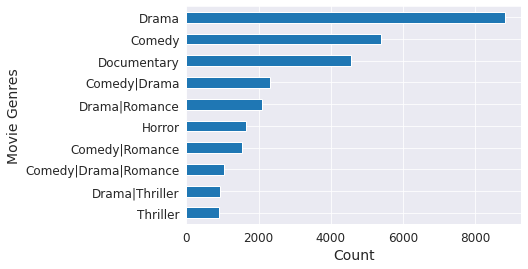

In [ ]:
movies_final["genres"].value_counts().nlargest(10).sort_values(ascending=True).plot.barh()
plt.xlabel("Count")
plt.ylabel("Movie Genres")

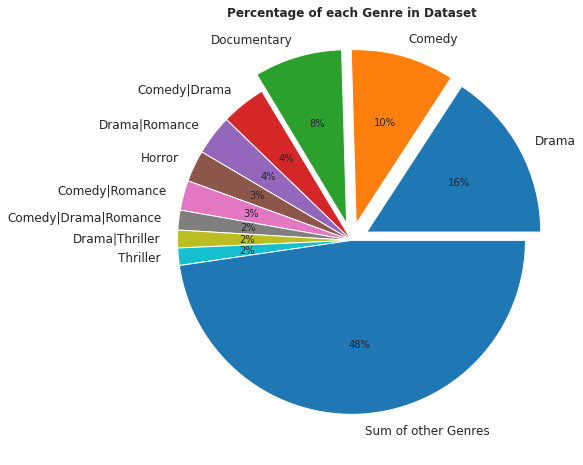

In [ ]:
data_genres_10= movies_final["genres"].value_counts()[:10].values.tolist()
sum_of_the_rest= sum(movies_final["genres"].value_counts()[10:])
data_genres_10.append(sum_of_the_rest)

explode= (0.1,0.1,0.1,0,0,0,0,0,0,0,0)
labels= movies_final["genres"].value_counts()[:10].index.tolist()
labels.append("Sum of other Genres")

plt.figure(figsize=(14,8))
plt.title("Percentage of each Genre in Dataset", fontweight="bold")
plt.pie(data_genres_10, labels=labels, explode=explode, autopct= "%1.f%%")
plt.show()

In [ ]:
movies_final["genres"].value_counts().sort_values(ascending=False).head(15)

Drama                   8836
Comedy                  5388
Documentary             4562
Comedy|Drama            2323
Drama|Romance           2086
Horror                  1639
Comedy|Romance          1548
Comedy|Drama|Romance    1028
Drama|Thriller           922
Thriller                 900
Crime|Drama              886
Horror|Thriller          846
Animation                676
Drama|War                635
Western                  554
Name: genres, dtype: int64

Checking if all movie overviews are in english language:

In [ ]:
pip install langdetect

     |████████████████████████████████| 983kB 2.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993195 sha256=7c676550224e85eb9d380a07563ddeb7087277acf2e7e83e8f94b89f95a30b1d
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect
detect(movies_final["overview"].to_string())

'en'

In [ ]:
'''
for ind in df.index: 
     print(df['Name'][ind], df['Stream'][ind]) 

for index, row in df.iterrows(): 
    print (row["Name"], row["Age"]) 

for index, row in movies_final.iterrows():
  if (detect(movies_final["overview"].to_string())) == "en":
    non_english_overviews.append(movies_final["overview"].index)
  if index==5:
    break


x=[]
for index,movieId,title,genres,tmdbId,overview in movies_final.itertuples():  # iterate over the DataFrame
    if (detect(movies_final["overview"].to_string())) != "en":
      x.append(index)
print (x)
'''

'\nfor ind in df.index: \n     print(df[\'Name\'][ind], df[\'Stream\'][ind]) \n\nfor index, row in df.iterrows(): \n    print (row["Name"], row["Age"]) \n\nfor index, row in movies_final.iterrows():\n  if (detect(movies_final["overview"].to_string())) == "en":\n    non_english_overviews.append(movies_final["overview"].index)\n  if index==5:\n    break\n\n\nx=[]\nfor index,movieId,title,genres,tmdbId,overview in movies_final.itertuples():  # iterate over the DataFrame\n    if (detect(movies_final["overview"].to_string())) != "en":\n      x.append(index)\nprint (x)\n'

In [ ]:
# changing the order of columns
movies_final= movies_final[["movieId", "tmdbId", "title", "genres", "overview" ]]

#### Extracting "`movies_final.csv`"

In [ ]:
# Saving it in a cvs file in order to work in another directory
from google.colab import files
#movies_final.to_csv('movies_final.csv', index=False)
#files.download('movies_final.csv')

In [ ]:
movies_final.shape

(55877, 5)

In [ ]:
movies_final.tail(2)

,movieId,tmdbId,title,genres,overview
62321,209163,553036.0,Bad Poems (2018),Comedy|Drama,"33-years old Tamás Merthner is heartbroken, af..."
62323,209171,79513.0,Women of Devil's Island (1962),Action|Adventure|Drama,Italian costume drama about convicted women in...


In [ ]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55877 entries, 0 to 62323
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   55877 non-null  object 
 1   tmdbId    55877 non-null  float64
 2   title     55877 non-null  object 
 3   genres    55877 non-null  object 
 4   overview  55877 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.6+ MB


In [ ]:
# converting the "movieId" from object to int type, so that the below merge can be achieved

movies_final['movieId'] = movies_final.movieId.astype(int)
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55877 entries, 0 to 62323
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movieId   55877 non-null  int64  
 1   tmdbId    55877 non-null  float64
 2   title     55877 non-null  object 
 3   genres    55877 non-null  object 
 4   overview  55877 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB


# Total/Other Merges

Procedure to merge `movies_final.csv` with `ratings.csv`

> ratings.csv:

In [ ]:
print("Shape of ratings.csv: {}".format(ratings.shape))
print("Unique movie ids in ratings.csv: {}".format(ratings.movieId.nunique()))

Shape of ratings.csv: (25000095, 5)
Unique movie ids in ratings.csv: 59047


In [ ]:
ratings.head(11)

,userId,movieId,rating,timestamp,rating_cat
0,1,296,5.0,1147880044,3
1,1,306,3.5,1147868817,2
2,1,307,5.0,1147868828,3
3,1,665,5.0,1147878820,3
4,1,899,3.5,1147868510,2
5,1,1088,4.0,1147868495,3
6,1,1175,3.5,1147868826,2
7,1,1217,3.5,1147878326,2
8,1,1237,5.0,1147868839,3
9,1,1250,4.0,1147868414,3


> movies_final(final_8.csv):

In [ ]:
print("Shape of movies_final.csv (final_8.csv): {}".format(movies_final.shape))
print("Unique movie ids in movies_final.csv (final_8.csv): {}".format(movies_final.movieId.nunique()))

Shape of movies_final.csv (final_8.csv): (55877, 5)
Unique movie ids in movies_final.csv (final_8.csv): 55877


In [ ]:
movies_final.head()

,movieId,tmdbId,title,genres,overview
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom..."
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...


## Merge: "tm1"

In [ ]:
# merge movies_final (movies_final.csv) with ratings (ratings.csv), based on 55,877 movie ids of movies_final (ratings.csv has more movies: 59,047)
# tm stands for Total Movies/Merges
tm1 = ratings.merge(movies_final, on="movieId")
tm1.shape

(24918092, 9)

In [ ]:
tm1.head()

,userId,movieId,rating,timestamp,rating_cat,tmdbId,title,genres,overview
0,1,296,5.0,1147880044,3,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par..."
1,3,296,5.0,1439474476,3,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par..."
2,4,296,4.0,1573938898,3,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par..."
3,5,296,4.0,830786155,3,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par..."
4,7,296,4.0,835444730,3,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par..."


In [ ]:
print("Shape of tm1: {}".format(tm1.shape))
print("Unique movie ids in tm1: {}".format(tm1.movieId.nunique()))

Shape of tm1: (24918092, 9)
Unique movie ids in tm1: 53058


> Removing "timestamp" and changing the order of columns:

In [ ]:
tm1=tm1[["movieId", "tmdbId", "title", "genres", "overview", "userId", "rating", "rating_cat" ]]
tm1.shape

(24918092, 8)

In [ ]:
tm1.head()

,movieId,tmdbId,title,genres,overview,userId,rating,rating_cat
0,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",1,5.0,3
1,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",3,5.0,3
2,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",4,4.0,3
3,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",5,4.0,3
4,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",7,4.0,3


### Visualising ratings (in tm1)

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

In [ ]:
tm1["rating"].value_counts().sort_values(ascending=False).head(10)

4.0    6621935
3.0    4885143
5.0    3599013
3.5    3164566
4.5    2190127
2.0    1636769
2.5    1257714
1.0     774520
1.5     397894
0.5     390411
Name: rating, dtype: int64

Text(0, 0.5, 'Number of Movies (in millions)')

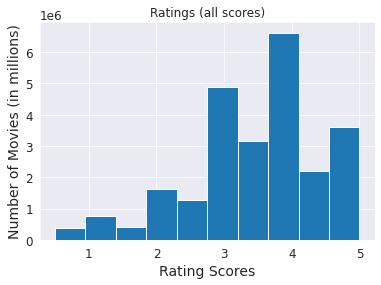

In [ ]:
tm1["rating"].hist()
plt.title("Ratings (all scores)")
plt.xlabel("Rating Scores")
plt.ylabel("Number of Movies (in millions)")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


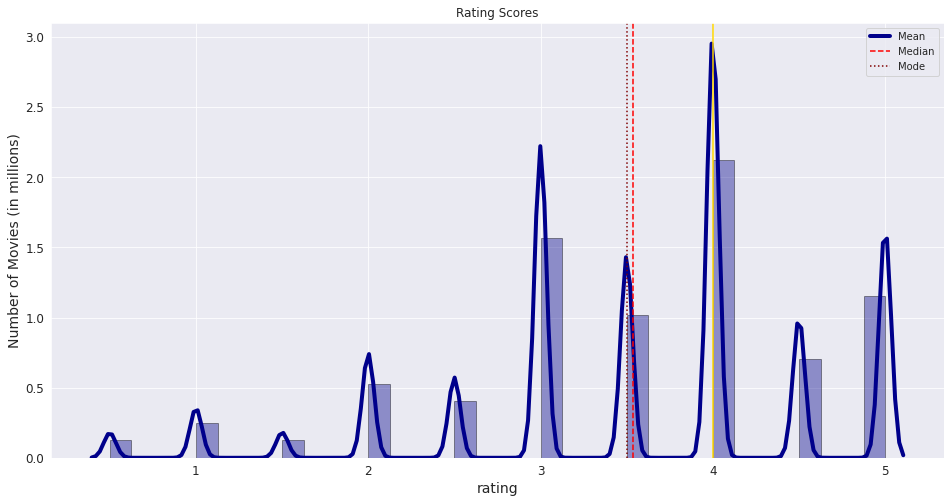

In [ ]:
# Density Plot and Histogram of ratings

mean= tm1["rating"].mean()
median= tm1["rating"].median()
mode = tm1['rating'].mode().iat[0]
plt.figure(figsize=(16,8))
sns.distplot(tm1.rating, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(mean,color='r', linestyle='--')
plt.axvline(median,color='maroon', linestyle=':')
plt.axvline(mode,color='gold', linestyle='-')


plt.legend({'Mean':mean,'Median':median,'Mode':mode})
plt.title("Rating Scores")
plt.ylabel("Number of Movies (in millions)")

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


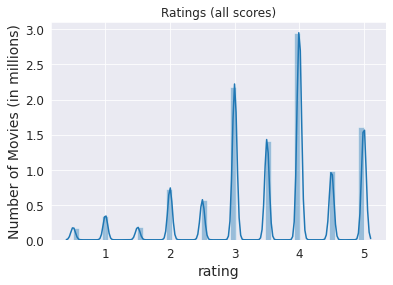

In [ ]:
import seaborn as sns
color= sns.color_palette()
sns.set_style('darkgrid')
sns.distplot(tm1.rating)
plt.title("Ratings (all scores)")
plt.ylabel("Number of Movies (in millions)")
plt.show()

> The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density, and the histogram is normalized by default so that it has the same y-scale as the density plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Movies (in millions)')

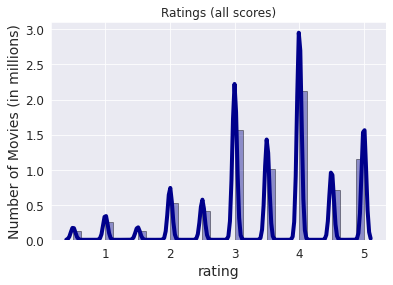

In [ ]:
# Density Plot and Histogram of ratings
sns.distplot(tm1.rating, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Ratings (all scores)")
plt.ylabel("Number of Movies (in millions)")

> Visualising the rating category (`rating_cat`)

In [ ]:
tm1.rating_cat.value_counts().sort_values(ascending=False)

3    12411075
2     9307423
1     3199594
Name: rating_cat, dtype: int64

Text(0, 0.5, 'Number of Movies (in millions)')

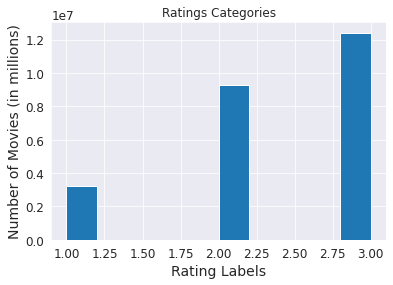

In [ ]:
tm1["rating_cat"].hist()
plt.title("Ratings Categories")
plt.xlabel("Rating Labels")
plt.ylabel("Number of Movies (in millions)")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


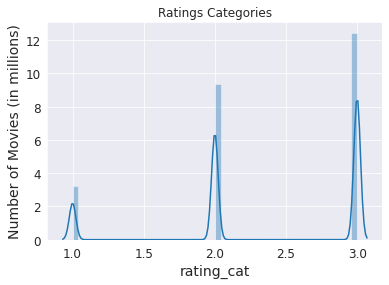

In [ ]:
import seaborn as sns
color= sns.color_palette()
sns.set_style('darkgrid')
sns.distplot(tm1.rating_cat)
plt.title("Ratings Categories")
plt.ylabel("Number of Movies (in millions)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of Movies (in millions)')

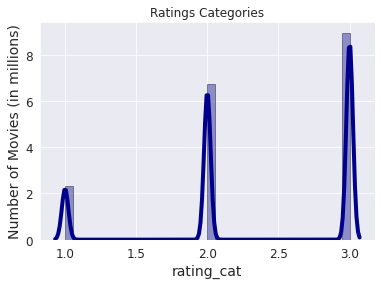

In [ ]:
# Density Plot and Histogram of rating categories
sns.distplot(tm1.rating_cat, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Ratings Categories")
plt.ylabel("Number of Movies (in millions)")

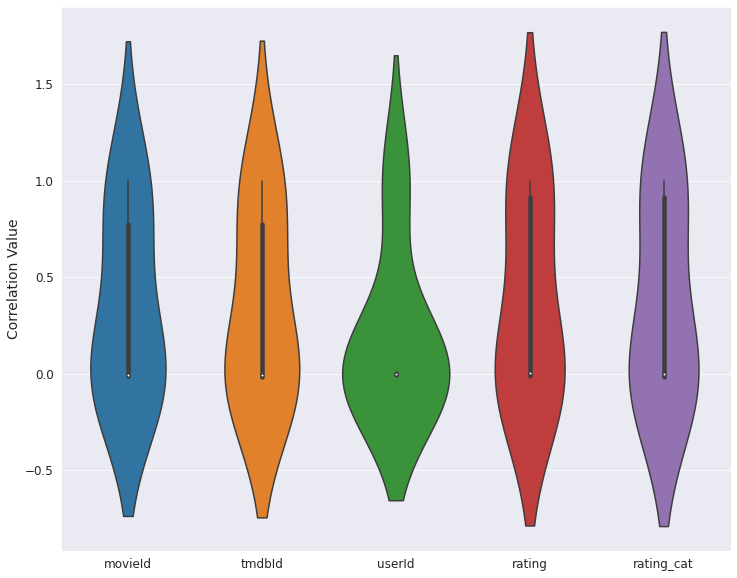

In [ ]:
# violin plot of numerical values in tm1

corr= tm1[["movieId", "tmdbId", "userId", "rating", "rating_cat"]].corr()
plt.figure(figsize=(12,10))
plt.ylabel("Correlation Value")
sns.violinplot(data=corr)
plt.show()

In [ ]:
tm1.head()

,movieId,tmdbId,title,genres,overview,userId,rating,rating_cat
0,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",1,5.0,3
1,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",3,5.0,3
2,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",4,4.0,3
3,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",5,4.0,3
4,296,680.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"A burger-loving hit man, his philosophical par...",7,4.0,3


In [ ]:
tm1.shape

(24918092, 8)

In [ ]:
genome_scores_final2.shape

(244484, 5)

In [ ]:
genome_scores_final2.movieId.nunique()

13770

In [ ]:
tm1.movieId.nunique()

53058

## Dataframe: `ratings_10k` 

Ratings.csv contains 162,541 unique urers with userIds in range (1, 162541)

"ratings_10k" dataframe is a reduced version of MovieLens "ratings.csv", and it contains 10,000 users: 
- first 3000 users with userIds in range (1, 3000) inclusive
- 3000 users with userids in range (100000 , 103000) inclusive
- last 3000 users of ratings.csv with userids in range (158543 , 162541) inclusive. UserId 162,541 is the last userId in ratings.csv


As in "ratings.csv", it includes an new column "rating_cat":
* 1<=rating score<=2 --> rating_cat=1 (negative score/category)
* 3<=rating score<=3 --> rating_cat=2 (neutral score/category)
* 4<=rating score<=5 --> rating_cat=3 (positive score/category)



Therefore, the original shape of (25000095 , 5) of ratings.csv now became: (1489023 , 4) formulating the new "ratings_10k" dataframe. This dataframe has one less column because feature "timestamp" is removed, and there are 10,000 users (contrary to ratings.csv with 162,541 users).

> Each user (in "ratings_10k") dataframe has given in average 150 ratings. (1,498,150 rows / 10,000 users =~ 150 ratings to 150 movies, since there is a 1:1 relationship between movies and ratings)

In [ ]:
data=[]

for row in ratings.itertuples(index=True, name="Pandas"):

  if row.userId >0 and row.userId <= 3000:
    # first 3000 users with userIds in range (1, 3000) inclusive
    data.append([row.userId, row.movieId, row.rating, row.rating_cat])

  elif row.userId >= 100000 and row.userId <= 103000:
    # 3000 users with userids in range (10000 , 103000) inclusive
    data.append([row.userId, row.movieId, row.rating, row.rating_cat])

  elif row.userId >= 158543 and row.userId <= 162541:
    # last 3000 users of ratings.csv with userids in range (158543 , 162541)
    data.append([row.userId, row.movieId, row.rating, row.rating_cat])

ratings_10k= pd.DataFrame(data, columns=["userId", "movieId", "rating", "rating_cat"])
ratings_10k.shape

(1489023, 4)

Data Exploration & Statistical Analysis

In [ ]:
ratings_10k.head()

,userId,movieId,rating,rating_cat
0,1,296,5.0,3
1,1,306,3.5,2
2,1,307,5.0,3
3,1,665,5.0,3
4,1,899,3.5,2


In [ ]:
print ("Number of unique user ids: {}".format(ratings_10k.userId.nunique()))

Number of unique user ids: 10000


In [ ]:
ratings_10k.isnull().sum().any()

False

In [ ]:
ratings_10k.describe()

,userId,movieId,rating,rating_cat
count,1.489023e+06,1.489023e+06,1.489023e+06,1.489023e+06
mean,9.622754e+04,2.056296e+04,3.553437e+00,2.381899e+00
std,6.554655e+04,3.814947e+04,1.053696e+00,6.978488e-01
min,1.000000e+00,1.000000e+00,5.000000e-01,1.000000e+00
25%,2.559000e+03,1.171000e+03,3.000000e+00,2.000000e+00
50%,1.019470e+05,2.857000e+03,4.000000e+00,3.000000e+00
75%,1.600220e+05,8.360000e+03,4.000000e+00,3.000000e+00
max,1.625410e+05,2.087930e+05,5.000000e+00,3.000000e+00


In [ ]:
ratings_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489023 entries, 0 to 1489022
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   userId      1489023 non-null  int64  
 1   movieId     1489023 non-null  int64  
 2   rating      1489023 non-null  float64
 3   rating_cat  1489023 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 45.4 MB


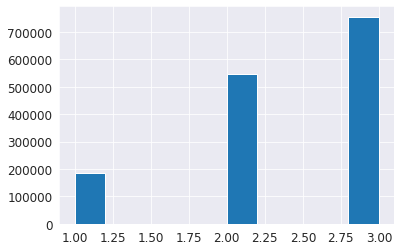

In [ ]:
ratings_10k.rating_cat.hist()

### Extracting `"ratings_10k"`

In [ ]:
'''
from google.colab import files

ratings_10k.to_csv('ratings_10k.csv', index=False)
files.download('ratings_10k.csv')
'''

"\nfrom google.colab import files\n\nratings_10k.to_csv('ratings_10k.csv', index=False)\nfiles.download('ratings_10k.csv')\n"

## Dataframe: `"tm_10k"`



"tm_10k" dataframe is the result of merging "movies_final.csv" and "ratings_10k.csv" based on the unique movieId.

In [ ]:
# merging ratings_10k with movies_final

tm_10k = movies_final.merge(ratings_10k, on="movieId")
tm_10k.shape

(1484524, 8)

In [ ]:
tm_10k.head(3)

,movieId,tmdbId,title,genres,overview,userId,rating,rating_cat
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",2,3.5,2
1,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",3,4.0,3
2,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...",4,3.0,2


### Extracting `"tm_10k.csv"`

In [ ]:
'''
from google.colab import files

tm_10k.to_csv('tm_10k.csv', index=False)
files.download('tm_10k.csv')
'''

"\nfrom google.colab import files\n\ntm_10k.to_csv('tm_10k.csv', index=False)\nfiles.download('tm_10k.csv')\n"